<a href="https://colab.research.google.com/github/bleenee203/IS335.P11---SQLi/blob/kthanh/Bigram_%2B_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [ ]:
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Data/Modified_SQL_Dataset.csv'
data = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.head())


                                               Query  Label
0                  " or pg_sleep  (  __TIME__  )  --      1
1  create user name identified by pass123 tempora...      1
2   AND 1  =  utl_inaddr.get_host_address   (    ...      1
3   select * from users where id  =  '1' or @ @1 ...      1
4   select * from users where id  =  1 or 1#"  ( ...      1


In [ ]:
# Fill NaN values (if any) and ensure the 'Query' column is string format
preprocessed_query = data['Query'].fillna('').apply(str)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize with bigrams (1, 2) and limit features if desired
count_vect = CountVectorizer(ngram_range=(1, 2), min_df=10, max_features=5000)
bigram_counts = count_vect.fit_transform(preprocessed_query)

# Verify the vectorized data
print("The shape of our text BOW vectorizer:", bigram_counts.shape)
feature_names = count_vect.get_feature_names_out()
print(f"Feature names (first 10): {feature_names[:10]}")


The shape of our text BOW vectorizer: (30919, 3313)
Feature names (first 10): ['01' '01 and' '06' '06 15' '07' '07 01' '07 31' '09' '09 34' '0x28']


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(bigram_counts, data['Label'], test_size=0.2, random_state=42)


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the SVM model and hyperparameter grid
svm_parameters = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
svm = SVC()

# Set up GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(estimator=svm, param_grid=svm_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

# Output the best score and parameters
print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score: 0.9945017182130584
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       1.00      1.00      1.00      6184



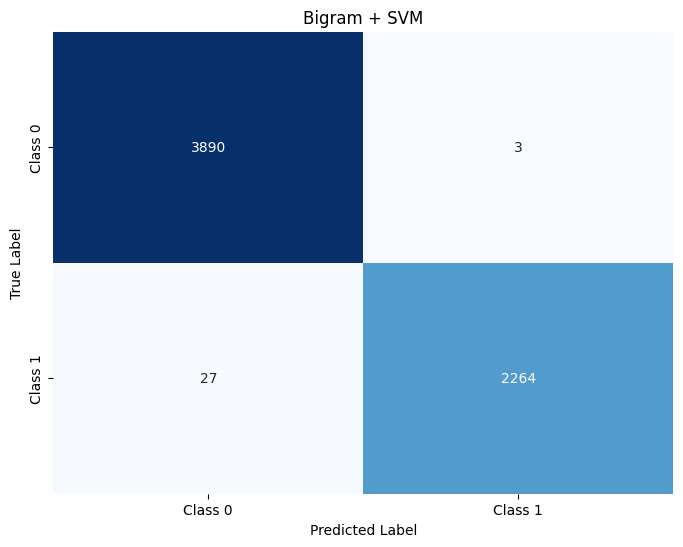

In [ ]:
# Make predictions on the test set
y_pred = grid.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + SVM')
plt.show()


**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Define the NB model and hyperparameter grid
nb_parameters = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'fit_prior': [True, False]
}
nb = MultinomialNB()

# Set up GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(estimator=nb, param_grid=nb_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

# Output the best score and parameters
print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Score: 0.9688700222356983
Best Parameters: {'alpha': 0.01, 'fit_prior': False}


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3893
           1       0.99      0.93      0.96      2291

    accuracy                           0.97      6184
   macro avg       0.98      0.96      0.97      6184
weighted avg       0.97      0.97      0.97      6184



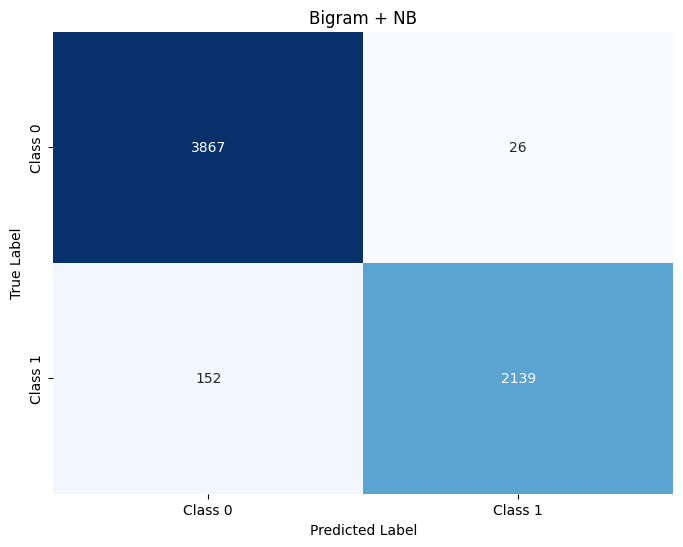

In [ ]:
# Make predictions on the test set
y_pred = grid.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + NB')
plt.show()


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model and hyperparameter grid
knn_parameters = {'n_neighbors': [1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
knn = KNeighborsClassifier()

# Set up GridSearchCV with 5-fold cross-validation
grid = GridSearchCV(estimator=knn, param_grid=knn_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

# Output the best score and parameters
print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 5 folds for each of 26 candidates, totalling 130 fits
Best Score: 0.9811198706286637
Best Parameters: {'n_neighbors': 3}


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3893
           1       0.96      0.99      0.97      2291

    accuracy                           0.98      6184
   macro avg       0.98      0.98      0.98      6184
weighted avg       0.98      0.98      0.98      6184



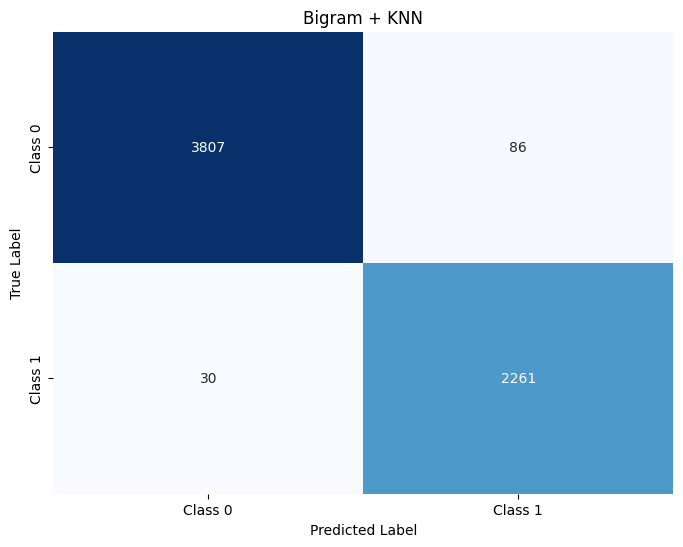

In [ ]:
# Make predictions on the test set
y_pred = grid.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + KNN')
plt.show()


**RANDOM FOREST **

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf_parameters = {
    'n_estimators': [10, 50, 100, 150],
    'max_depth': [10, 20, 30, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier()

grid = GridSearchCV(estimator=rf, param_grid=rf_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Score: 0.9948251465534668
Best Parameters: {'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [ ]:

y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       1.00      1.00      1.00      6184



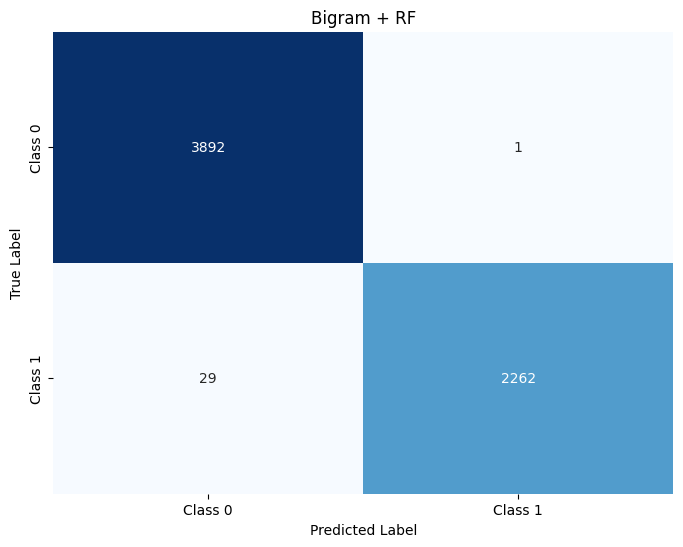

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + RF')
plt.show()

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_parameters = {
    'n_estimators': [10, 50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
#Weak Learner
base = DecisionTreeClassifier(max_depth=1)
#Ensemble learning
ada = AdaBoostClassifier(estimator=base)

grid = GridSearchCV(estimator=ada, param_grid=ada_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Best Score: 0.9942591469577522
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}


In [ ]:
y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           1.00      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       1.00      1.00      1.00      6184



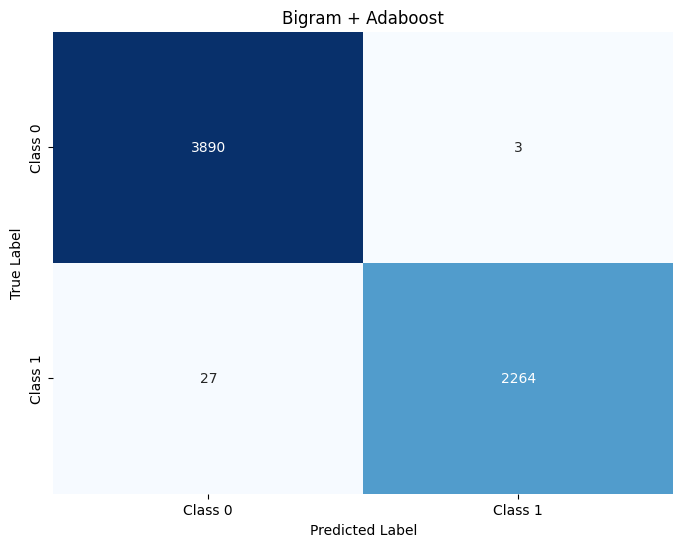

In [ ]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + Adaboost')
plt.show()

**XGBoost**

In [ ]:

from xgboost import XGBClassifier

xgb_parameters = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid = GridSearchCV(estimator=xgb, param_grid=xgb_parameters, scoring='accuracy', verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Score: " + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:56] WARNING: /worksp

Best Score: 0.9933697190216293
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}


In [ ]:
y_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3893
           1       1.00      0.99      0.99      2291

    accuracy                           0.99      6184
   macro avg       1.00      0.99      0.99      6184
weighted avg       0.99      0.99      0.99      6184



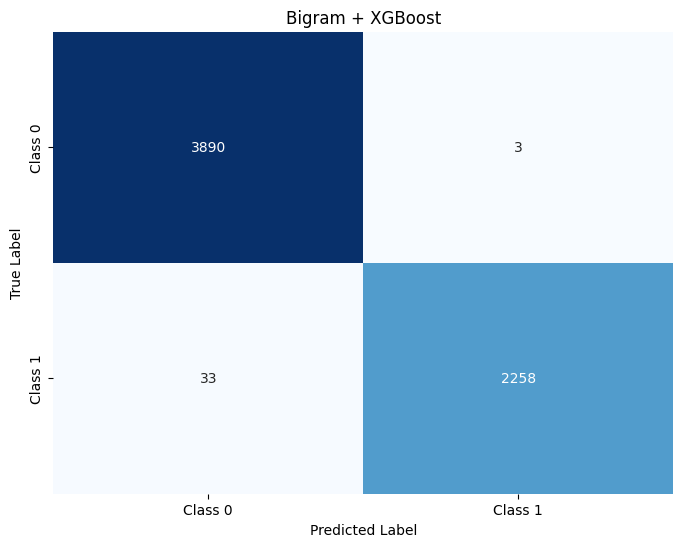

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Bigram + XGBoost')
plt.show()
